In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [62]:
mall_dataset = pd.read_csv("/Users/morouj/Desktop/Data Visualization/Assinment/Mall_Customers.csv")
mall_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
mall_dataset.shape

(200, 5)

In [64]:
mall_dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [65]:
mall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [66]:
 mall_dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [67]:
# Checking for null values
mall_dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [68]:
mall_dataset.describe(include = object)

,Gender
count,200
unique,2
top,Female
freq,112


In [69]:
mall_dataset["Gender"].unique()

array(['Male', 'Female'], dtype=object)

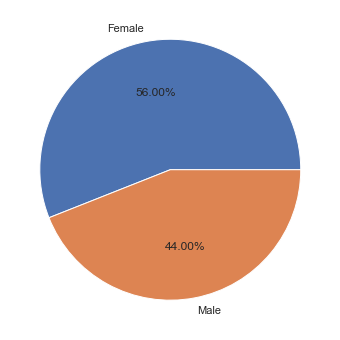

In [73]:
plt.rcParams['figure.figsize'] = (12,6)

plt.pie(mall_dataset['Gender'].value_counts(), labels = ['Female','Male'],autopct = '%.2f%%')
plt.show()

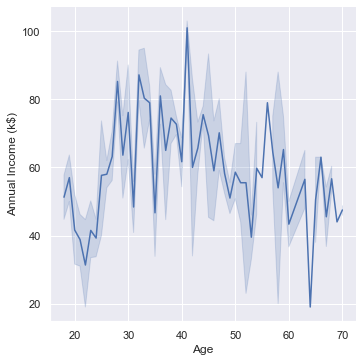

In [74]:
figure = sns.relplot(x="Age", y="Annual Income (k$)", data=mall_dataset,kind="line",ci=68)

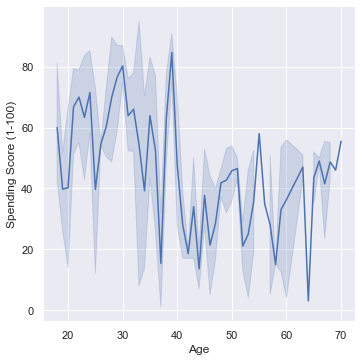

In [75]:
sns.relplot(x="Age",y="Spending Score (1-100)",data=mall_dataset, kind="line")

In [76]:
# Add a column for the age stage
def age_stage (r):
    stage = ''
    if (r < 21):
        stage = 'Tenager'
    elif (r >= 21 and r < 35 ):
        stage ='Youth'
    elif(r >= 35 and r < 49):
        stage = 'Maturity'
    else:
        stage = 'Aging'
    return stage

mall_dataset["Age_stage"] = mall_dataset["Age"].apply(age_stage)
mall_dataset.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_stage
0,1,Male,19,15,39,Tenager
1,2,Male,21,15,81,Youth
2,3,Female,20,16,6,Tenager
3,4,Female,23,16,77,Youth
4,5,Female,31,17,40,Youth


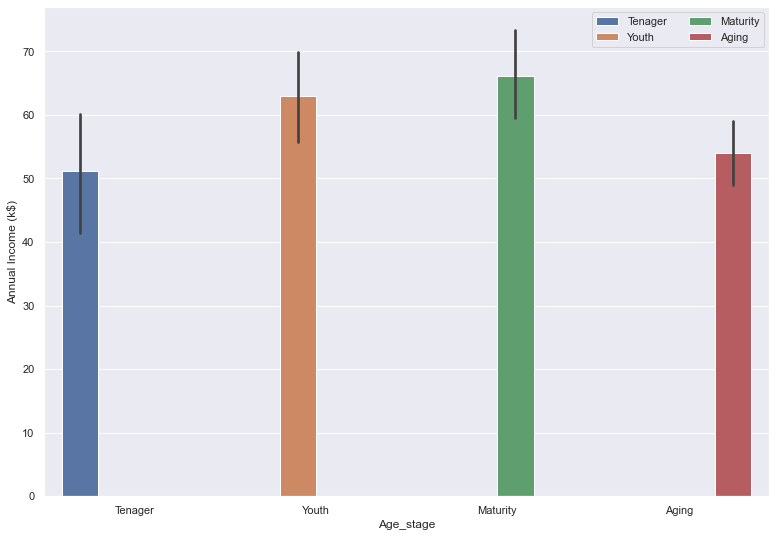

In [77]:
sns.set(rc={'figure.figsize':(13,9)})
figure2 = sns.barplot(x="Age_stage",y="Annual Income (k$)",data=mall_dataset, hue="Age_stage")
figure2.legend(loc="upper right" , ncol=2)

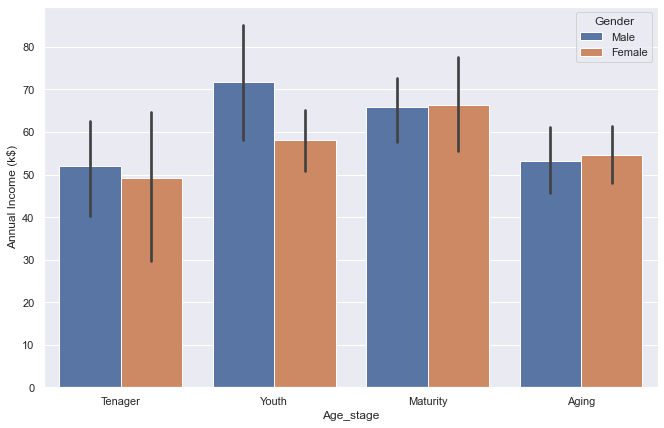

In [78]:
sns.set(rc={'figure.figsize':(11,7)})
figure2 = sns.barplot(x="Age_stage",y="Annual Income (k$)",data=mall_dataset, hue="Gender")


In [79]:
df_Maturity = mall_dataset.loc[mall_dataset["Age_stage"] == "Maturity"]
df_Maturity.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_stage
6,7,Female,35,18,6,Maturity
11,12,Female,35,19,99,Maturity
14,15,Male,37,20,13,Maturity
16,17,Female,35,21,35,Maturity
19,20,Female,35,23,98,Maturity


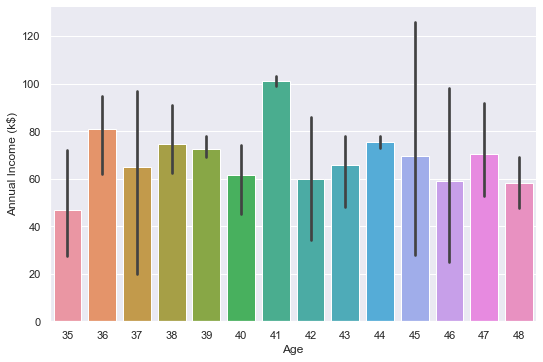

In [80]:
sns.catplot(x="Age",y="Annual Income (k$)",data=df_Maturity,kind="bar",aspect =1.5,estimator=np.mean )

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

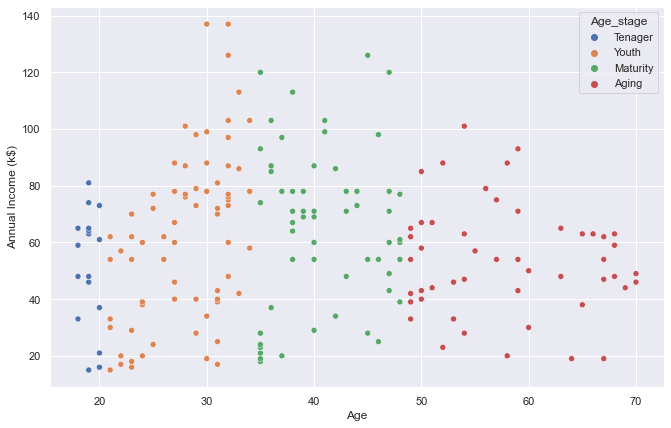

In [81]:
sns.scatterplot(x='Age', y='Annual Income (k$)',data=mall_dataset,hue="Age_stage")

In [82]:
####### k means....
X= mall_dataset.iloc[:, [3,4]].values
# Within-Cluster-Sum-of-Squares
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters
# n number of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#inertia_ is the formula used to segregate the data points into clusters, cluster boundary



In [83]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++',max_iter = 300, n_init = 10, random_state=0)

y_means= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

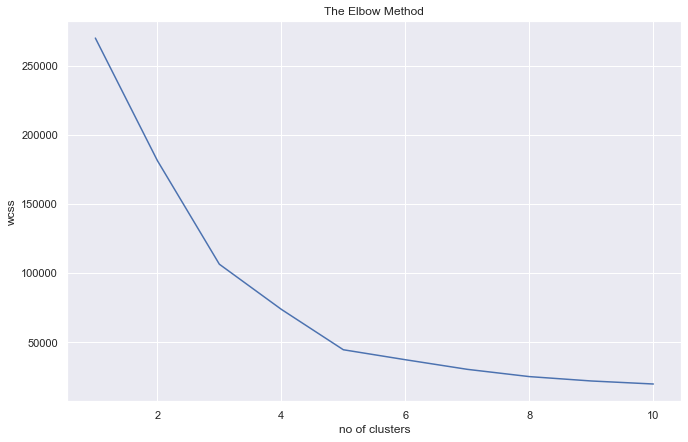

In [84]:
#selecting 5 becuase it's minimal drop point.
#Elbow method is used for finding the optimal number of clusters in the dataset. It runs k-means clustering a number of times and calculate the average score for all clusters where score is the sum of square of distances between each point to its assigned cluster center
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#From the Elbow method, we can observe that the optimal number of clusters are 5. After 5 there is no significant difference in the Sum of Square of differences.

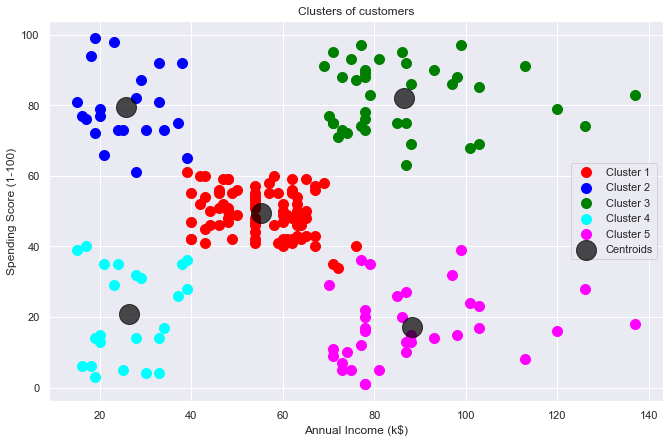

In [88]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# I have changed centroids
centers = kmeansmodel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.7, label = 'Centroids');
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [87]:
#Cluster 1 (Red Color) ->average in terms of earning and spending 

#cluster 2 (Blue Colr) ->earning less but spending more

#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]

#cluster 4 (cyan Color) -> Earning less , spending less

#Cluster 5 (magenta Color) -> earning high but spending less


######We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these re easy to converse ######
#wherein others we can set like once in a week or once in a month